## Case Study on Testing of Hypothesis

### A company started to invest in digital marketing as a new way of their product promotions.For that they collected data and decided to carry out a study on it.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data=pd.read_csv('Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [3]:
data.shape

(22, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [5]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [6]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


## The company wishes to clarify whether there is any increase in sales after stepping into digital marketing


H0: The Average sales after digital add is less than or equal to the average sales before digital add

H1: The average sales after digital add is greater than the average sales before digital add

In [7]:
t_value,p_value = stats.ttest_rel(data['Sales_After_digital_add(in $)'],data['Sales_before_digital_add(in $)'],alternative ='greater')

In [8]:
print("t-statistic value : ",round(t_value,5))
print("p value :",round(p_value,7))

t-statistic value :  12.09071
p value : 0.0


### p value is less than 0.05,so we can reject the null hypothesis .Digital add had increased the sales.

### ● The company needs to check whether there is any dependency between the features “Region” and “Manager”


### chisquare test

H0 : Region and Manager are independent

H1: Region and manager are dependent

In [13]:
crosstab=pd.crosstab(data['Region'],data['Manager'])
crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


<AxesSubplot:xlabel='Region'>

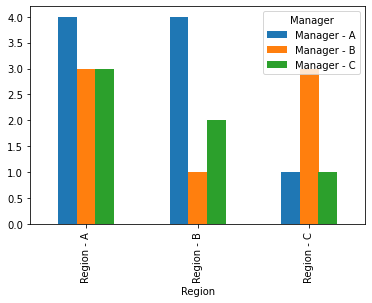

In [14]:
crosstab.plot(kind='bar')

In [17]:
chi2,p,dof,exp_freq =stats.chi2_contingency(crosstab)
print("Chisquare statistic value:",round(chi2,5))
print("Chisquare p-value:",round(p,5) )

Chisquare statistic value: 3.05057
Chisquare p-value: 0.5494


### p value is greater than 0.05 so we accept the null hypothesis.  Region and Manager are independent.